In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
my_marker = ['o', 'v', '^', '<', '>', 's', 'd', 'p','*', 'D' ]
my_mfc = ['r','g','k','c','b','y','p','none']

\begin{align}
\Gamma_{G}(L_a,L_D)=\Gamma_{G}(\inf)+G_{\Gamma}e^{-\frac{\xi}{l_{ph}}}\tag{1} 
\end{align}

Equation (1) from [Cançado, Jorio](https://doi.org/10.1088/2053-1583/aa5e77) article

In [3]:
def eq1(xi, G_inf = 15, C_g = 87, l_ph = 16): # \xi in 'nm'
    return G_inf+C_g*np.exp(-xi/l_ph)

In [4]:
def eq2(La, С_s1 = 30.3, l_s = 2, C_a1 = 30.4, l_e = 4.1):
#     return (4*30.3*2*(La-2)+2*30.4*4.1*(La-2*2)*(1-np.exp(-(La-2*2)/4.1)))*1/(La*La)
    return (4*С_s1*l_s*(La-l_s)+2*C_a1*l_e*(La-2*l_s)*(1-np.exp(-(La-2*l_s)/l_e)))*1/(La*La)

In [5]:
def eq3(LD, С_s0 = 51., r_s = 2.2, C_a0 = 26.5, l_e = 3.7):
#     return 51*(1-np.exp(-(np.pi*2.2*2.2)/(LD*LD)))+2*np.pi/(LD*LD)*26.5*3.7*(3.7+2.2)*np.exp(-(np.pi*2.2*2.2)/(LD*LD))
    return С_s0*(1-np.exp(-(np.pi*r_s*r_s)/(LD*LD)))+2*np.pi/(LD*LD)*C_a0*l_e*(l_e+r_s)*np.exp(-np.pi*r_s*r_s/(LD*LD))

In [6]:
def eq4(La, LD, С_s0 = 51., r_s = 2.2, С_s1 = 30.3, l_s = 2, C_a0 = 26.5, l_e = 4.1, C_a1 = 30.4): # they forgot in table 1 that r_s also used in eq4
    r = np.pi*r_s*r_s/LD/LD
    a = С_s0*(1-np.exp(-r))
    b = 4*С_s1*l_s*(La-l_s)/(La*La)*np.exp(-r)
    c = 2*np.pi/(LD*LD)*C_a0*l_e*(l_e+r_s)*np.exp(-r)*(1-4*l_s*(La-l_s)/(La*La))
    d = 2*C_a1*l_e*(La-2*l_s)/(La*La)*(1-np.exp(-(La-2*l_s)/l_e))*np.exp(-r)
    return  a + b + c + d

# def eq4(La, LD): # they forgot in table 1 that r_s also used in eq4
#     r = np.pi*2.2*2.2/LD/LD
#     a = 51*(1-np.exp(-r))
#     b = 4*30.3*2*(La-2)/(La*La)*np.exp(-r)
#     c = 2*np.pi/(LD*LD)*26.5*4.1*(4.1+2.2)*np.exp(-r)*(1-4*2*(La-2)/(La*La))
#     d = 2*30.4*4.1*(La-2*2)/(La*La)*(1-np.exp(-(La-2*2)/4.1))*np.exp(-r)
#     return  a + b + c + d

           

In [7]:
L_a = np.linspace(4,1000,99600) # step 0.01nm  
# -- it is not the same as in Fig.2., it is the same as in caption to Fig.2. (you have to start from less value e.g. 0.04 to get the same image, m.b. nicer just nicer view)
# we'll keep it in more phisical manner as it claims in caption L_a starts from 4nm
L_D = np.linspace(0.01,1000,99999) # step 0.01nm

In [8]:
plt.rc('axes', labelsize=18) #https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

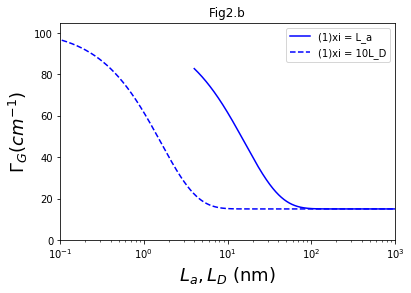

In [9]:
fig, ax = plt.subplots()
plt.xscale('log')
ax.plot(L_a, eq1(L_a),"b", label= '(1)xi = L_a')
plt.xlim(0.1, 1000)
plt.ylim(0, 105)
ax.set(xlim=(0.1, 1000), ylim=(0, 105),
       xlabel='$L_a, L_D$ (nm)', ylabel='$\Gamma_G(cm^{-1})$',
       title='Fig2.b');

ax.plot(L_D, eq1(10*L_D), "--b", label='(1)xi = 10L_D')
ax.legend()



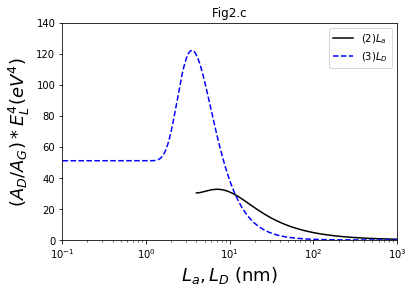

In [10]:
fig, ax = plt.subplots()
plt.xscale('log')
ax.plot(L_a, eq2(L_a),"black", label= '(2)$L_a$')
ax.set(xlim=(0.1, 1000), ylim=(0, 140),
       xlabel='$L_a, L_D$ (nm)', ylabel='$(A_D/A_G)*E_L^4(eV^{4})$',
       title='Fig2.c');
ax.plot(L_D, eq3(L_D), "--b", label='(3)$L_D$')

ax.legend()


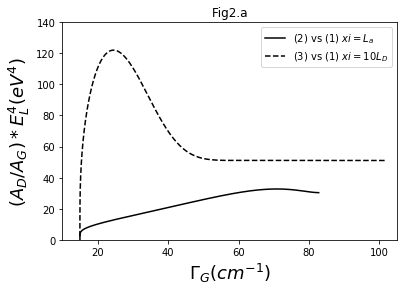

In [11]:
fig, ax = plt.subplots()
ax.plot(eq1(L_a), eq2(L_a),"k", label= '(2) vs (1) ${xi}=L_a$')
plt.xlim(10, 105)
plt.ylim(0, 140)
ax.set(xlim=(10, 105), ylim=(0, 140),
       xlabel='$\Gamma_G(cm^{-1})$', ylabel='$(A_D/A_G)*E_L^4(eV^{4})$',
       title='Fig2.a');

ax.plot(eq1(10*L_D), eq3(L_D), "--k", label='(3) vs (1) ${xi}=10L_D$')
ax.legend()

# Test eq4(La, LD) = eq2(La, 500) =  eq3(500,LD)

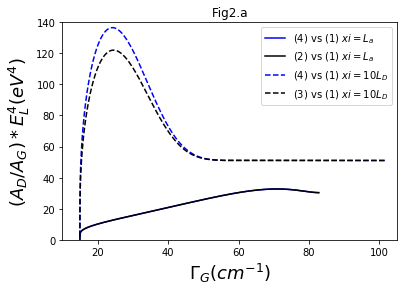

In [12]:
# eq4(La, LD) = eq2(La, 500) =  eq3(500,LD)
fig, ax = plt.subplots()
ax.plot(eq1(L_a), eq4(L_a,500),"b", label= '(4) vs (1) ${xi}=L_a$')
ax.plot(eq1(L_a), eq2(L_a),"k", label= '(2) vs (1) ${xi}=L_a$')
plt.xlim(10, 105)
plt.ylim(0, 140)
ax.set(xlim=(10, 105), ylim=(0, 140),
       xlabel='$\Gamma_G(cm^{-1})$', ylabel='$(A_D/A_G)*E_L^4(eV^{4})$',
       title='Fig2.a');

ax.plot(eq1(10*L_D), eq4(500,L_D), "--b", label='(4) vs (1) ${xi}=10L_D$')
ax.plot(eq1(10*L_D), eq3(L_D), "--k", label='(3) vs (1) ${xi}=10L_D$')
ax.legend()

# may be difference in <L> -->  L, anyway mathematically not strickt because l_e = 4.1nm for (eq2) and (eq4), but 3.7nm for (eq3) 

# Fig.3 Handle

In [13]:
f3L_a = np.array([4.1,4.6,5.3,6.2,7.4,8.9,10.7,13.1,16.2,20.0,24.9,31.2,39.2,49.3,62.2,78.6,99.4])
f3L_D = np.array([2.2,2.6,3.2,3.9,4.7,5.7,7.0,8.4,10.3,12.5,15.1,18.4,22.3,27.1,32.9,39.9])
f3L_D.shape,f3L_a.shape

((16,), (17,))

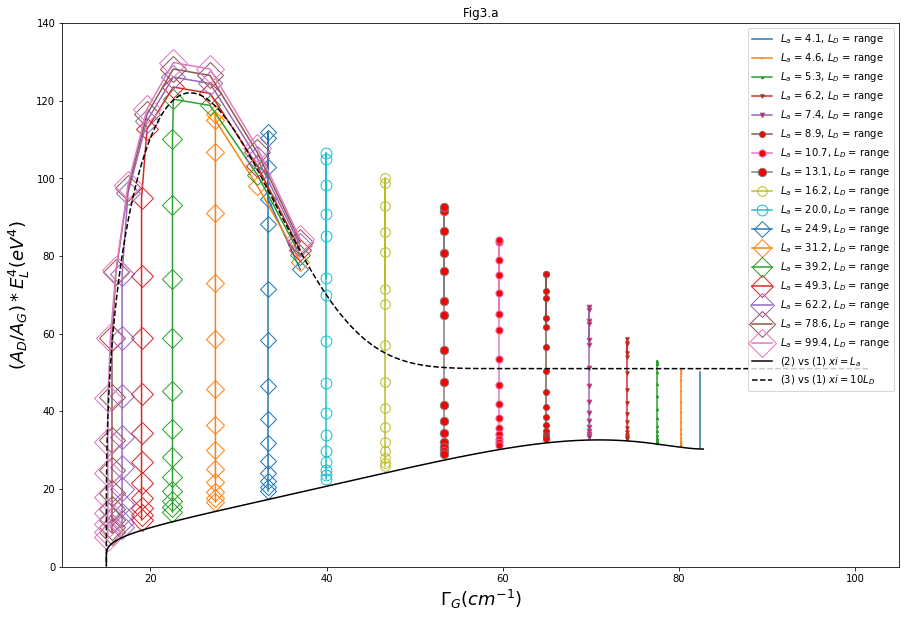

In [31]:
%matplotlib inline
# def eq4(La, LD):
fig, ax = plt.subplots(figsize = (15,10))
plt.xlim(10, 105)
plt.ylim(0, 140)
ax.set(xlim=(10, 105), ylim=(0, 140),
       xlabel='$\Gamma_G(cm^{-1})$', ylabel='$(A_D/A_G)*E_L^4(eV^{4})$',
       title='Fig3.a');
i = 0
for la in f3L_a:
    i+= 1
    k = len(my_marker)//i
    dummy = f3L_D.copy()
    dummy[10*dummy>la] = la/10
    s = np.array([10*0.12*n for n in range(len(f3L_a))])
    ax.plot(eq1(10*dummy), eq4(np.array([la]*f3L_D.shape[0]), f3L_D), marker = my_marker[k-1], markersize = s[i-1], mfc=my_mfc[len(my_mfc)//i-1], label= '$L_a$ = {}, $L_D$ = range'.format(la)) # \xi should be min(f3L_a,500)
    # print('$L_D$ = {}'.format(i))

ax.plot(eq1(L_a), eq2(L_a),"k", label= '(2) vs (1) ${xi}=L_a$')
ax.plot(eq1(10*L_D), eq3(L_D), "--k", label='(3) vs (1) ${xi}=10L_D$')
ax.legend()


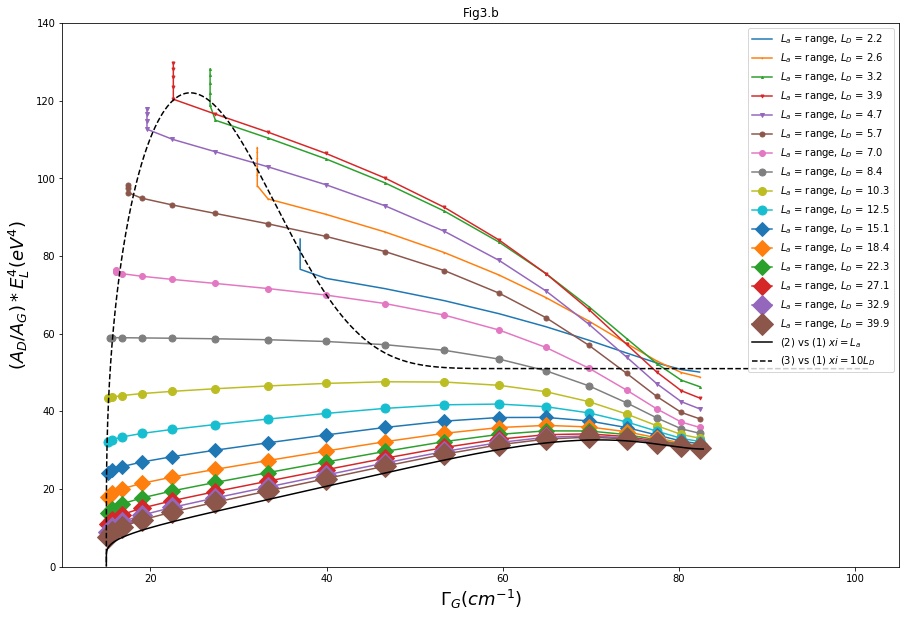

In [34]:
%matplotlib inline
# def eq4(La, LD):
fig, ax = plt.subplots(figsize=(15, 10))
plt.xlim(10, 105)
plt.ylim(0, 140)
ax.set(xlim=(10, 105), ylim=(0, 140),
       xlabel='$\Gamma_G(cm^{-1})$', ylabel='$(A_D/A_G)*E_L^4(eV^{4})$',
       title='Fig3.b');
i = 0
for ld in f3L_D: 
    i+=1
    k = len(my_marker)//i
    dummy = f3L_a.copy()
    dummy[dummy>10*ld]=10*ld
    s = np.array([10*0.1*n for n in range(len(f3L_D))])
    ax.plot(eq1(dummy), eq4(f3L_a, np.array([ld]*f3L_a.shape[0])), label= '$L_a$ = range, $L_D$ = {}'.format(ld), markersize = s[i-1], marker=my_marker[k-1]) # \xi should be min(f3L_a,500)
    # print('$L_D$ = {}'.format(i))

ax.plot(eq1(L_a), eq2(L_a),"k", label= '(2) vs (1) ${xi}=L_a$')
ax.plot(eq1(10*L_D), eq3(L_D), "--k", label='(3) vs (1) ${xi}=10L_D$')
ax.legend()

In [16]:
dummy = f3L_D.copy()
dummy[dummy>4]=4
dummy, f3L_D

(array([ 2.2,  2.6,  3.2,  3.9,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,
         4. ,  4. ,  4. ,  4. ,  4. ]),
 array([  2.2,   2.6,   3.2,   3.9,   4.7,   5.7,   7. ,   8.4,  10.3,
         12.5,  15.1,  18.4,  22.3,  27.1,  32.9,  39.9]))

In [17]:
temp=f3L_a[f3L_a[:]<7]

In [18]:
len(my_marker)//100

0

In [19]:
my_marker[6]

'd'

In [20]:
my_marker

['o', 'v', '^', '<', '>', 's', 'd', 'p', '*', 'D']